#### Data Set

Como informacion voy a usar principalmente el dataset proporcionado por netflix que toma informacion sobre las peliculas y series mas vistas globalmente por cada semana en los ultimos 3 años. Para definir el top 10 netflix se basa en las horas vistas de la serie/pelicula esa semana
Tambien usare como complementos otras bases de datos que vaya investigando a medida que hago el EDA.


Las columnas se componen de la siguiente manera:

| Nombre | Informacion
|----------|----------
| week | Semana sobra la que toma informacion  | 
| weekly_rank| Ranking del 1 al 10   | 
| show_title    | Titulo de la pelicula/serie   | 
| season_title | nombre de la temporada(si la tiene)   | 
| weekly_hours_viewed| Horas vistas esa semana   | 
| runtime    | Duracion en horas del producto   | 
| weekly_views | Veces vista esa semana   | 
| cumulative_weeks_in_top_10| Cantidad de semanas totales en el top 10   | 
| is_staggered_launch    | Si fue un lanzamiento escalonado  | 
| episode_launch_details    | Detalles del lanzamiento escalonado   | 



Lo que busco encontrar entre todos estos datos es:
- Las producciones mas vistas en los ultimos 3 años
- Ver si estas producciones coinciden con una critica positiva, negativa, o ninguna de las dos. 
- Ver si coincide lo mas visto con lo que mas duró en el top 10 a lo largo de las semanas
- Intentar hacer alguna recomendacion basada en todo lo anterior
- Otras preguntas que me puedan surgir haciendolo

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_excel("./data/all-weeks-global.xlsx")

In [3]:
nombres = sorted(df["show_title"].drop_duplicates().tolist())
nombres


["'83",
 '10 Days of a Bad Man',
 '10 Days of a Good Man',
 '1000 Miles from Christmas',
 '12 Strong',
 '13 Hours: The Secret Soldiers of Benghazi',
 '14 Peaks: Nothing Is Impossible',
 '1899',
 '1917',
 '2 Guns',
 '2 Hearts',
 '20th Century Girl',
 '21 Jump Street',
 '211',
 '28 Days Haunted',
 '365 Days',
 '365 Days: This Day',
 '4 Kings',
 '40 Years Young',
 '42 Days of Darkness',
 '47 Meters Down: Uncaged',
 '47 Ronin',
 '6 Underground',
 '65',
 '6ixtynin9 The Series',
 '7 Prisoners',
 '7 Women and a Murder',
 '85 South: Ghetto Legends',
 'A Bad Moms Christmas',
 'A Beautiful Life',
 'A Boy Called Christmas',
 'A California Christmas: City Lights',
 'A Castle For Christmas',
 'A Christmas Miracle for Daisy',
 'A Classic Horror Story',
 'A Cut Above',
 'A Day and a Half',
 'A Deadly Invitation',
 "A Dog's Journey",
 "A Dog's Way Home",
 'A Hard Day',
 "A Jazzman's Blues",
 'A Life Too Short: The Isabella Nardoni Case',
 'A Madea Homecoming',
 'A Man Called Otto',
 'A Man of Action',

In [4]:
######### Numero de cada nombre de serie/pelicula que estuvo en el top 10 semanal en los ultimos 3 años de Netflix.
cantidad = len(nombres)
cantidad

1669

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        5120 non-null   object 
 1   category                    5120 non-null   object 
 2   weekly_rank                 5120 non-null   int64  
 3   show_title                  5120 non-null   object 
 4   season_title                2479 non-null   object 
 5   weekly_hours_viewed         5120 non-null   int64  
 6   runtime                     1040 non-null   float64
 7   weekly_views                1040 non-null   float64
 8   cumulative_weeks_in_top_10  5120 non-null   int64  
 9   is_staggered_launch         5120 non-null   bool   
 10  episode_launch_details      38 non-null     object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 405.1+ KB


In [6]:
asd = df['show_title'] == 'Red Notice'
df[asd][['week','weekly_hours_viewed']]
sns

<module 'seaborn' from 'c:\\Users\\kaled\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

In [7]:
####### Hago una copia del DF, cambio las semanas que eran str a date, elimino las ultimas dos columnas porque son irrelevantes para lo que quiero tratar.
df2 = df.copy()
df2['week'] = pd.to_datetime(df2['week'], errors = 'coerce')
df2 = df2.drop(df2.columns[-2:], axis=1) 
df2

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
0,2023-12-10,Films (English),1,Leave the World Behind,NaN,98700000,2.3667,41700000.0,1
1,2023-12-10,Films (English),2,Family Switch,NaN,32900000,1.7667,18600000.0,2
2,2023-12-10,Films (English),3,Leo,NaN,25400000,1.7833,14200000.0,3
3,2023-12-10,Films (English),4,The Super Mario Bros. Movie,NaN,20300000,1.5333,13200000.0,2
4,2023-12-10,Films (English),5,Catering Christmas,NaN,12500000,1.4333,8700000.0,2
...,...,...,...,...,...,...,...,...,...
5115,2021-07-04,TV (Non-English),6,Elite,Elite: Season 1,10530000,NaN,NaN,1
5116,2021-07-04,TV (Non-English),7,Elite,Elite: Season 3,10200000,NaN,NaN,1
5117,2021-07-04,TV (Non-English),8,Elite,Elite: Season 2,10140000,NaN,NaN,1
5118,2021-07-04,TV (Non-English),9,Katla,Katla: Season 1,9190000,NaN,NaN,1


In [8]:
resultado = df[df['show_title'] == 'The Imitation Game']
resultado

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details


In [9]:
''' 
NETFLIX AND EDA: 
Hacer dos DF distintos, uno para series y otro para peliculas
agrupar por titulo y sumarle las horas vistas, para decir en un grafico "las mas miradas fueron estas", independeitemente del ranking en el top 10. Usar el titulo y el cumulative
para saber cuantas semnas estuvo trending, decir que habla de su popularidad ademaas de las horas.

hacer siempre comparacion serie/pelicula en slides distintas, uso mas tiempo. 
buscar datos de calidad de las 5 mas vistas en cualquier caso.

Dos slides de recomendaciones: 
- Las mas vistas para asegurarte entretenmiento (basado en la generalidad de las personas que no suele ser bueno)
- Las menos vistas para ser snob y hacerte el cool con tus amigos o invitadx especial
'''

' \nNETFLIX AND EDA: \nHacer dos DF distintos, uno para series y otro para peliculas\nagrupar por titulo y sumarle las horas vistas, para decir en un grafico "las mas miradas fueron estas", independeitemente del ranking en el top 10. Usar el titulo y el cumulative\npara saber cuantas semnas estuvo trending, decir que habla de su popularidad ademaas de las horas.\n\nhacer siempre comparacion serie/pelicula en slides distintas, uso mas tiempo. \nbuscar datos de calidad de las 5 mas vistas en cualquier caso.\n\nDos slides de recomendaciones: \n- Las mas vistas para asegurarte entretenmiento (basado en la generalidad de las personas que no suele ser bueno)\n- Las menos vistas para ser snob y hacerte el cool con tus amigos o invitadx especial\n'

In [10]:
dfpeliculas = df2.loc[df2["category"].str.contains('Films')]
dfpeliculas.drop(columns= 'season_title',inplace= True)
dfpeliculas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 0 to 5099
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week                        2560 non-null   datetime64[ns]
 1   category                    2560 non-null   object        
 2   weekly_rank                 2560 non-null   int64         
 3   show_title                  2560 non-null   object        
 4   weekly_hours_viewed         2560 non-null   int64         
 5   runtime                     520 non-null    float64       
 6   weekly_views                520 non-null    float64       
 7   cumulative_weeks_in_top_10  2560 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 180.0+ KB


C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\2048210032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpeliculas.drop(columns= 'season_title',inplace= True)


In [11]:
dfpeliculas.drop(columns= ['runtime', 'weekly_views'], inplace= True)
dfpeliculas


C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\432807175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpeliculas.drop(columns= ['runtime', 'weekly_views'], inplace= True)


,week,category,weekly_rank,show_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2023-12-10,Films (English),1,Leave the World Behind,98700000,1
1,2023-12-10,Films (English),2,Family Switch,32900000,2
2,2023-12-10,Films (English),3,Leo,25400000,3
3,2023-12-10,Films (English),4,The Super Mario Bros. Movie,20300000,2
4,2023-12-10,Films (English),5,Catering Christmas,12500000,2
...,...,...,...,...,...,...
5095,2021-07-04,Films (Non-English),6,Security,2950000,1
5096,2021-07-04,Films (Non-English),7,Murder by the Coast,2690000,1
5097,2021-07-04,Films (Non-English),8,Xtreme,2650000,1
5098,2021-07-04,Films (Non-English),9,Rurouni Kenshin: Origins,2150000,1


In [12]:
''' vamos a dropear runtime y weekly views porque hay demasiados nulos y no aportan mucho a la comparacion'''
dfseries = df2.loc[df2['category'].str.contains('TV')]
dfseries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 20 to 5119
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week                        2560 non-null   datetime64[ns]
 1   category                    2560 non-null   object        
 2   weekly_rank                 2560 non-null   int64         
 3   show_title                  2560 non-null   object        
 4   season_title                2477 non-null   object        
 5   weekly_hours_viewed         2560 non-null   int64         
 6   runtime                     520 non-null    float64       
 7   weekly_views                520 non-null    float64       
 8   cumulative_weeks_in_top_10  2560 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 200.0+ KB


Busco los titulos de series que mas se repiten en el Top 10

In [15]:
top_titles = dfseries.loc[dfseries.groupby('show_title')['weekly_rank'].idxmax()]

# títulos con el valor más grande en "cumulative_weeks_in_top_10"
series_top5_titles = top_titles.nlargest(5, 'cumulative_weeks_in_top_10')
series_top5_titles

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
2199,2022-11-27,TV (Non-English),10,Café con aroma de mujer,Café con aroma de mujer: Season 1,6310000,NaN,NaN,28
3279,2022-05-22,TV (Non-English),10,"Yo soy Betty, la fea","Yo soy Betty, la fea: Season 1",9650000,NaN,NaN,24
2159,2022-12-04,TV (Non-English),10,Extraordinary Attorney Woo,Extraordinary Attorney Woo: Season 1,5500000,NaN,NaN,21
3119,2022-06-19,TV (Non-English),10,Squid Game,Squid Game: Season 1,7480000,NaN,NaN,20
1349,2023-04-23,TV (English),10,Wednesday,Wednesday: Season 1,9500000,NaN,NaN,20


Lo mismo pero para peliculas

In [16]:
top_peliculas = dfpeliculas.loc[dfpeliculas.groupby('show_title')['weekly_rank'].idxmax()]
# títulos con el valor más grande en "cumulative_weeks_in_top_10"
peliculas_top5_titles = top_peliculas.nlargest(5, 'cumulative_weeks_in_top_10')
peliculas_top5_titles

,week,category,weekly_rank,show_title,weekly_hours_viewed,cumulative_weeks_in_top_10
1339,2023-04-23,Films (Non-English),10,All Quiet on the Western Front,1340000,22
2378,2022-10-23,Films (Non-English),9,Blood Red Sky,1510000,16
1899,2023-01-15,Films (Non-English),10,RRR (Hindi),1820000,16
2849,2022-07-31,Films (English),10,Red Notice,4090000,14
488,2023-09-17,Films (English),9,The Boss Baby,4600000,13


Ahora voy a hacer lo mismo pero para ver las horas vistas de cada produccion, de series y peliculas

In [17]:
########### Producciones mas vistas en los ultimos 3 años 

topseries = dfseries.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()
topseries.nlargest(30, "weekly_hours_viewed")

,show_title,weekly_hours_viewed
424,Stranger Things,2967980000
420,Squid Game,2315500000
558,Wednesday,1806850000
287,Manifest,1320520000
578,You,1245390000
301,Money Heist,1170200000
512,The Witcher,1117900000
67,Bridgerton,1040310000
341,Outer Banks,964410000
108,DAHMER,962470000


In [18]:
toppelis = dfpeliculas.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()
toppelis.nlargest(20, "weekly_hours_viewed")

,show_title,weekly_hours_viewed
667,Red Notice,453990000
233,Don't Look Up,389580000
326,Glass Onion: A Knives Out Mystery,301730000
842,The Gray Man,265980000
786,The Adam Project,260520000
267,Extraction 2,254900000
888,The Mother,243060000
651,Purple Hearts,240480000
948,The Unforgivable,219550000
387,Hustle,198310000


Las calificaciones me las guarde para mi pero no las termine usando

In [19]:
clasificaciones_pelis= {'Red Notice': 6.3 , 'Dont Look Up': 7.2	 , 'Glass Onion: A Knives Out Mystery': 7.1,'The Gray Man': 6.5	,'The Adam Project': 6.7}	
clasificaciones_Series= {'Stranger Things': 8.7 , 'Squid Game': 8	 , 'Wednesday': 8.1	,'Manifest': 7.1	,'You': 7.7}

C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\2163576087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')


(0.0, 3428.0169)

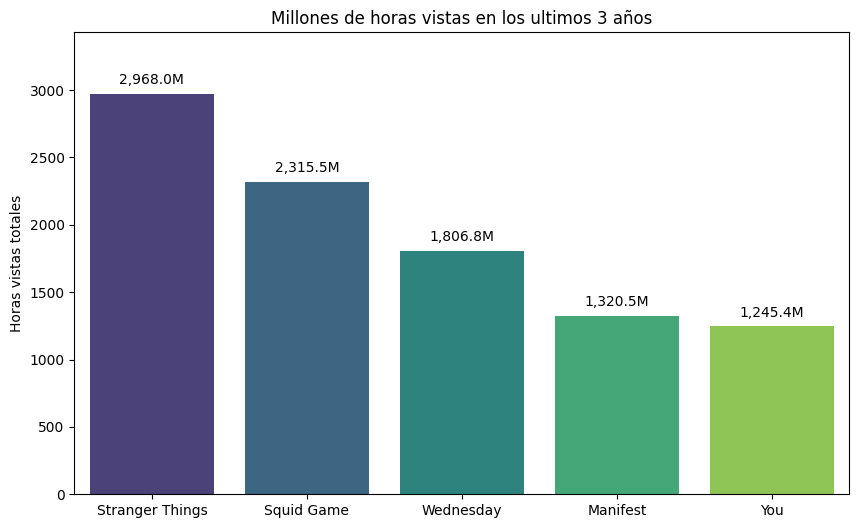

In [20]:
########### Grafico de series mas vistas:

topseries['weekly_hours_viewed'] = topseries['weekly_hours_viewed'] / 1000000
grafico = topseries.nlargest(5, "weekly_hours_viewed")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')
plt.xlabel('')
plt.ylabel('Horas vistas totales')
plt.title('Millones de horas vistas en los ultimos 3 años')
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)



C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\2804495225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')


(0.0, 524.3584500000001)

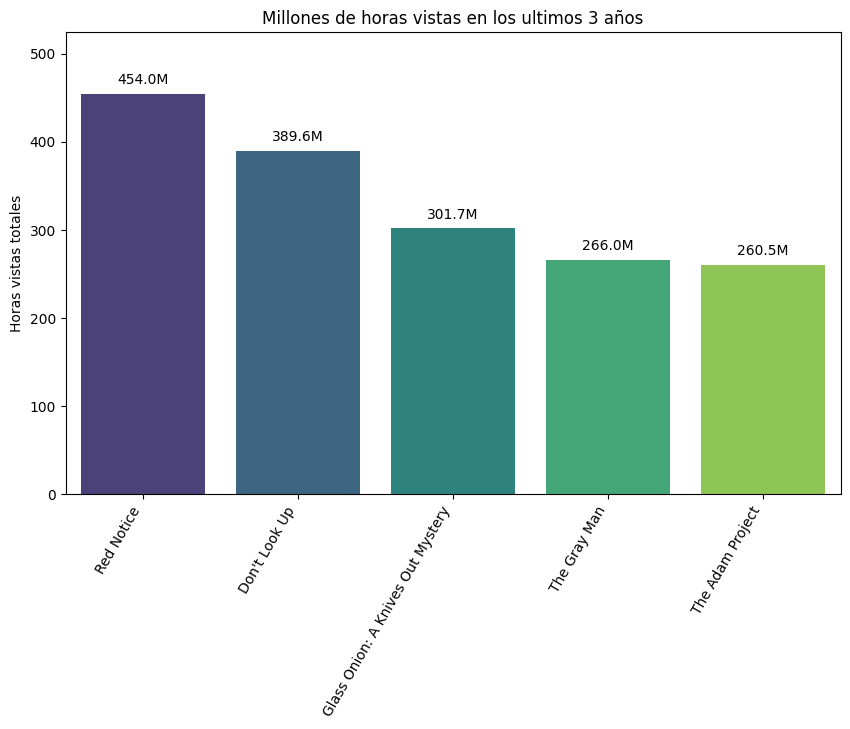

In [21]:
########### Grafico de peliculas mas vistas:
toppelis['weekly_hours_viewed'] = toppelis['weekly_hours_viewed'] / 1000000

grafico = toppelis.nlargest(5, "weekly_hours_viewed")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')
plt.xlabel('')
plt.ylabel('Horas vistas totales')
plt.title('Millones de horas vistas en los ultimos 3 años')
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=60, ha='right')
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)


In [22]:
############# Intento de historigrama fallido 
'''
top_5_show_titles = grafico['show_title'].unique()
top_5_show_titles
filtered_df = df[df['show_title'].isin(top_5_show_titles)]

# Crear un historiograma para cada uno de los 5 valores únicos en "show_title"
g = sns.FacetGrid(filtered_df, col="show_title", col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'week', 'weekly_hours_viewed', bins=100, kde=True, color='skyblue')

# Añadir etiquetas y título
g.set_axis_labels("Weeks", "Weekly Hours Viewed")
g.fig.suptitle('Histogram for Weekly Hours Viewed - Top 5 Show Titles', y=1.02)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los historiogramas
plt.show()'''
selected_title = "Red Notice"
selected_data = df[df['show_title'] == selected_title]
selected_data





,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
2849,2022-07-31,Films (English),10,Red Notice,NaN,4090000,NaN,NaN,14,False,NaN
3729,2022-02-27,Films (English),10,Red Notice,NaN,4970000,NaN,NaN,13,False,NaN
3885,2022-01-30,Films (English),6,Red Notice,NaN,6540000,NaN,NaN,12,False,NaN
3927,2022-01-23,Films (English),8,Red Notice,NaN,7310000,NaN,NaN,11,False,NaN
3965,2022-01-16,Films (English),6,Red Notice,NaN,8710000,NaN,NaN,10,False,NaN
4005,2022-01-09,Films (English),6,Red Notice,NaN,11090000,NaN,NaN,9,False,NaN
4044,2022-01-02,Films (English),5,Red Notice,NaN,14540000,NaN,NaN,8,False,NaN
4086,2021-12-26,Films (English),7,Red Notice,NaN,12140000,NaN,NaN,7,False,NaN
4123,2021-12-19,Films (English),4,Red Notice,NaN,12710000,NaN,NaN,6,False,NaN
4161,2021-12-12,Films (English),2,Red Notice,NaN,18010000,NaN,NaN,5,False,NaN


C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\811577943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')


(4.5, -0.75)

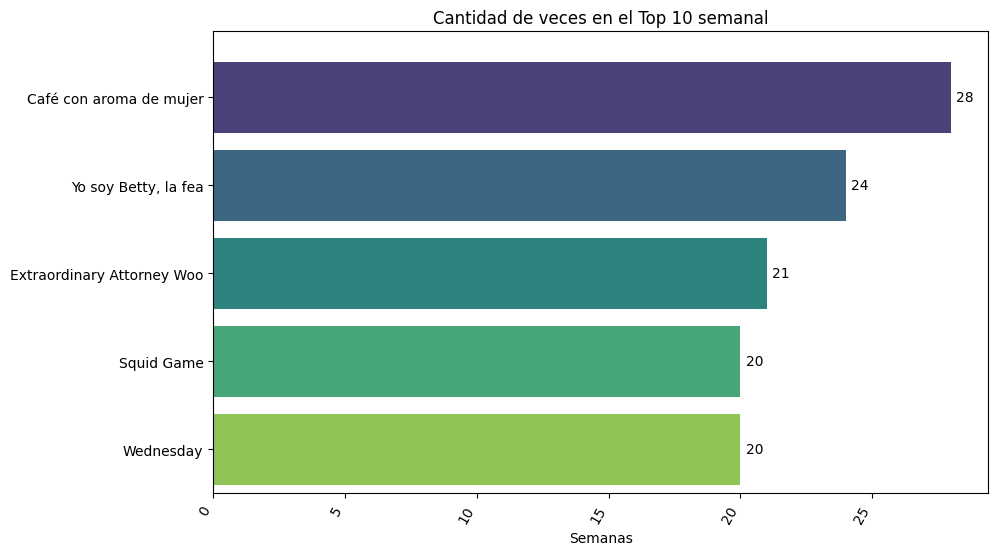

In [23]:
######Frecuencia series 
grafico = series_top5_titles

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')

plt.xlabel('Semanas')
plt.ylabel('')
plt.title('Cantidad de veces en el Top 10 semanal')
plt.ticklabel_format(style='plain', axis='x')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}',  
                (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.xticks(rotation=60, ha='right')
ax.set_ylim(top=ax.get_ylim()[1] * 1.5)

C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\389494462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')


(4.5, -0.75)

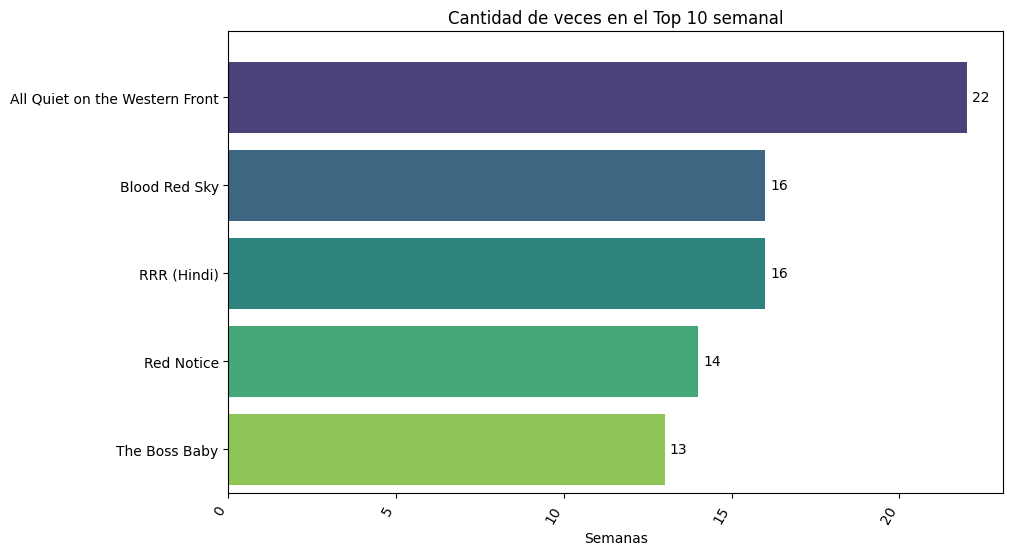

In [24]:
######### Frecuencia Pelis 
grafico = peliculas_top5_titles

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')

plt.xlabel('Semanas')
plt.ylabel('')
plt.title('Cantidad de veces en el Top 10 semanal')
plt.ticklabel_format(style='plain', axis='x')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}',  
                (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.xticks(rotation=60, ha='right')
ax.set_ylim(top=ax.get_ylim()[1] * 1.5)

C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\586464946.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_topseries, palette=colores_gigi, alpha= 0.8)
C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\586464946.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\586464946.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_series_top5, palette=colores_gigi2, al

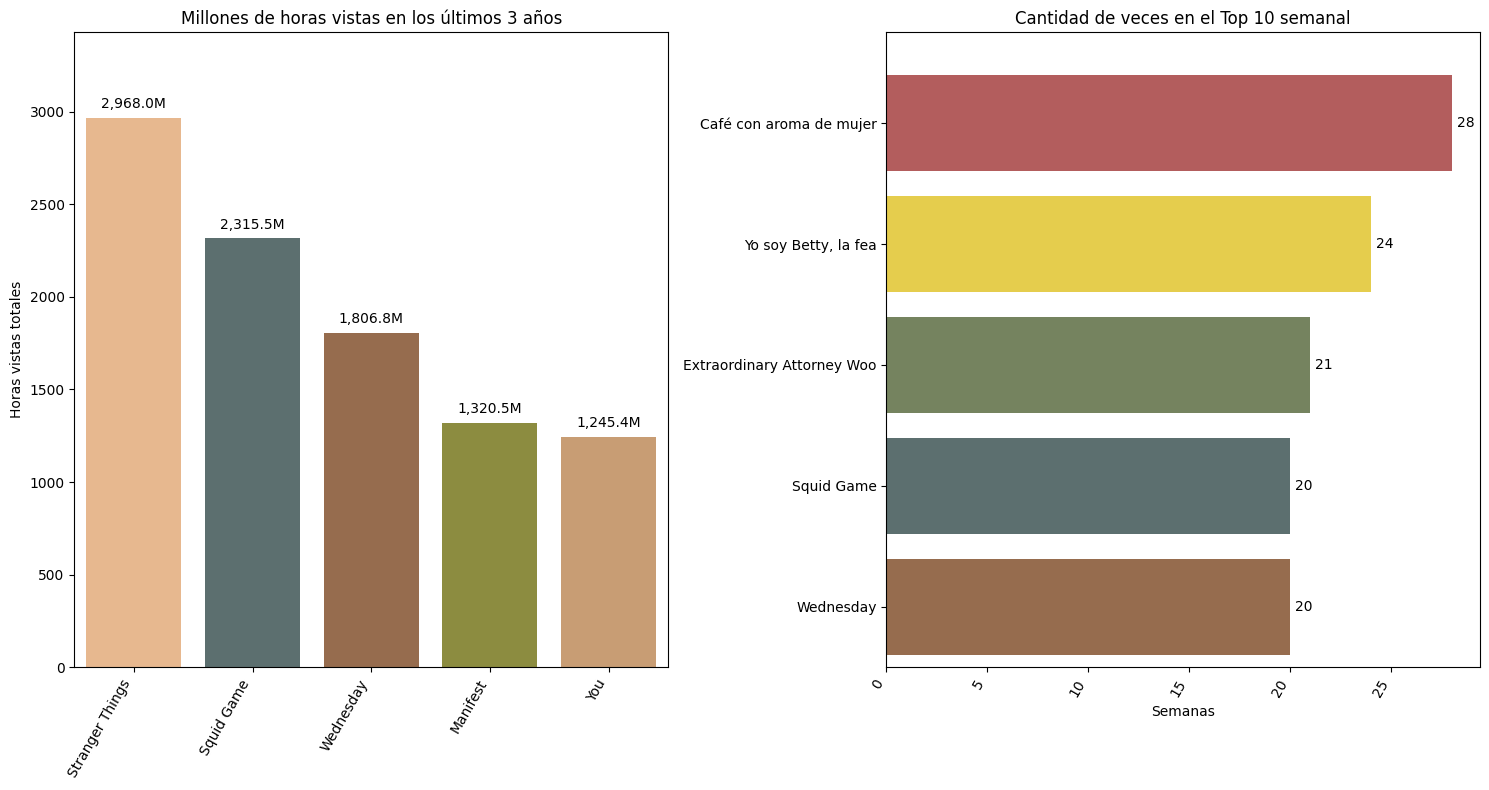

In [39]:


# Preprocesamiento de datos para topseries
#topseries['weekly_hours_viewed'] = topseries['weekly_hours_viewed'] / 1000000
grafico_topseries = topseries.nlargest(5, "weekly_hours_viewed")
pastel_magenta_hex = '#FFB6C1'


colores_gigi = ['sandybrown','darkslategrey','saddlebrown','olive','peru']
colores_gigi2 = ['firebrick','gold','darkolivegreen','darkslategrey', 'saddlebrown']

# Grafico combinado
plt.figure(figsize=(15, 8))

# Primer gráfico
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_topseries, palette=colores_gigi, alpha= 0.8)
ax1.set_xlabel('')
ax1.set_ylabel('Horas vistas totales')
ax1.set_title('Millones de horas vistas en los últimos 3 años')
ax1.ticklabel_format(style='plain', axis='y')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.1f}M',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.1)

# Segundo gráfico
plt.subplot(1, 2, 2)
grafico_series_top5 = series_top5_titles
ax2 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_series_top5, palette=colores_gigi2, alpha = 0.8)
ax2.set_xlabel('Semanas')
ax2.set_ylabel('')
ax2.set_title('Cantidad de veces en el Top 10 semanal')
ax2.ticklabel_format(style='plain', axis='x')
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.0f}',
                 (width, p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.5)

# Ajustes de diseño
plt.tight_layout()
plt.savefig("series.png")
plt.show()


C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\4090410681.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
C:\Users\kaled\AppData\Local\Temp\ipykernel_4560\4090410681.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60, ha='right')


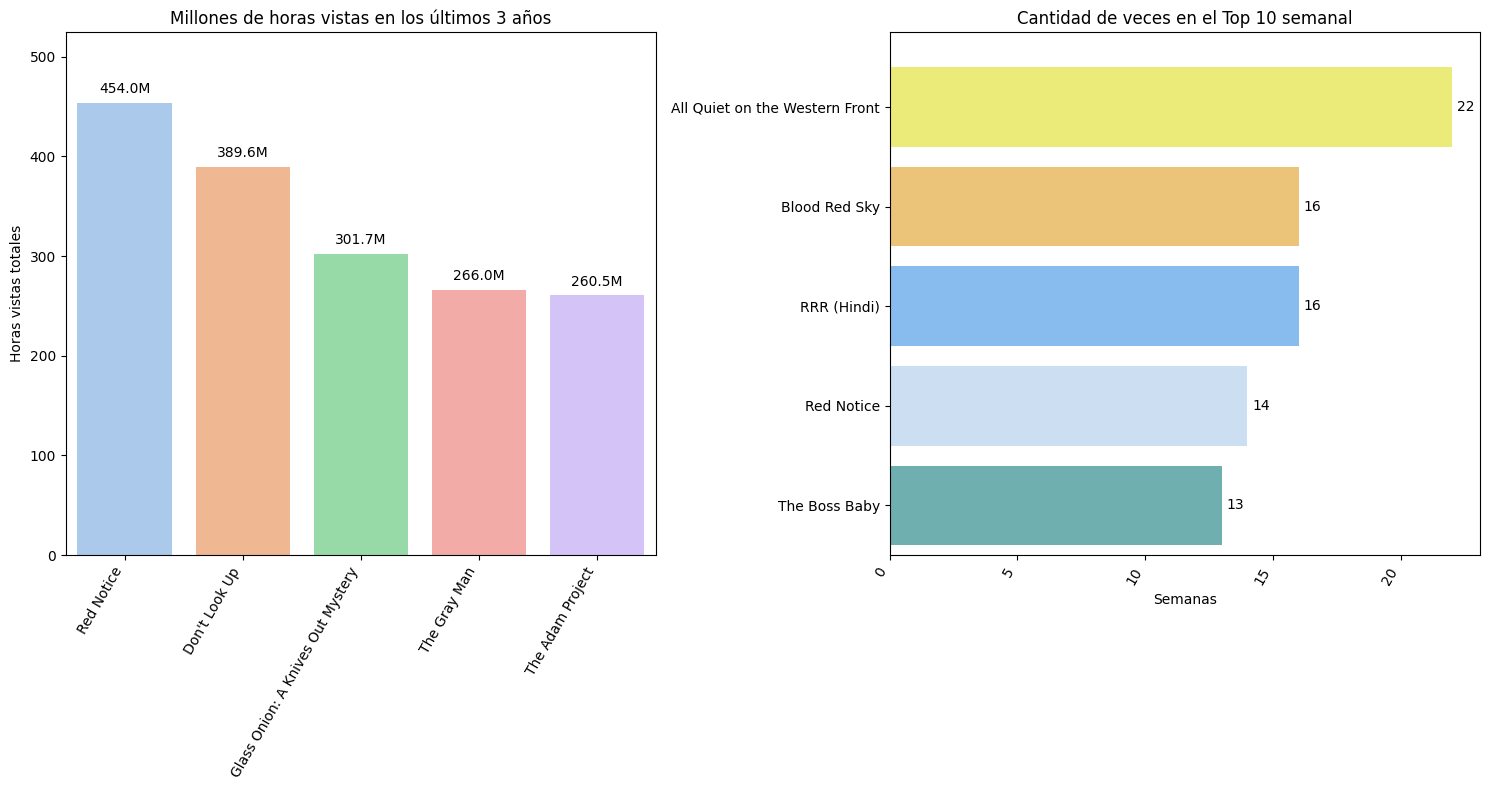

In [40]:

grafico_toppelis = toppelis.nlargest(5, "weekly_hours_viewed")

grafico_peliculas_top5 = peliculas_top5_titles
primer_color_pastel = sns.color_palette("pastel")[0]
colores_gigi3 = ['yellow', 'orange', 'dodgerblue',primer_color_pastel,'darkcyan']
# Grafico combinado
plt.figure(figsize=(15, 8))

# Primer gráfico
plt.subplot(1, 2, 1)
ax2 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_toppelis, palette='pastel', hue = 'show_title', legend= False)
ax2.set_xlabel('')
ax2.set_ylabel('Horas vistas totales')
ax2.set_title('Millones de horas vistas en los últimos 3 años')
ax2.ticklabel_format(style='plain', axis='y')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.1f}M',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.1)

# Segundo gráfico
plt.subplot(1, 2, 2)
ax3 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_peliculas_top5, palette=colores_gigi3, alpha = 0.6, hue= 'show_title', legend= False)
ax3.set_xlabel('Semanas')
ax3.set_ylabel('')
ax3.set_title('Cantidad de veces en el Top 10 semanal')
ax3.ticklabel_format(style='plain', axis='x')
for p in ax3.patches:
    width = p.get_width()
    ax3.annotate(f'{width:.0f}',
                 (width, p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60, ha='right')
ax3.set_ylim(top=ax3.get_ylim()[1] * 1.5)

# Ajustes de diseño
plt.tight_layout()
plt.savefig("peliculas.png")
plt.show()

In [28]:
grafico_toppelis2 = grafico_toppelis
nueva_columna = [6.3, 7.2, 7.1, 6.5, 6.7]
grafico_toppelis2['puntuaciones'] = nueva_columna
grafico_toppelis2




,show_title,weekly_hours_viewed,puntuaciones
667,Red Notice,453.99,6.3
233,Don't Look Up,389.58,7.2
326,Glass Onion: A Knives Out Mystery,301.73,7.1
842,The Gray Man,265.98,6.5
786,The Adam Project,260.52,6.7


In [1]:
''''''''' 
En definitiva, estas fueron las cosas que hice para analizar el pequeño data frame, podria haber hecho mas seguramente con una API para las calificaciones, lo intente 
y no me salio bien
'''

' \nEn definitiva, estas fueron las cosas que hice para analizar el pequeño data frame, podria haber hecho mas seguramente con una API para las calificaciones, lo intente y no me salio bien\n'